In [95]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
wafers=pd.read_csv('wafers.csv')
print('shape of the feature store dataset:',wafers.shape)
wafers.head()

shape of the feature store dataset: (100, 592)


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [97]:
wafers.shape

(100, 592)

In [98]:
wafers.drop(columns=['Unnamed: 0','Good/Bad']).iloc[:100].to_csv('test.csv',index=False)

In [99]:
wafers.rename(columns={'Unnamed: 0':'Wafer'},inplace=True)

In [100]:
wafers.head()

,Wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [101]:
from sklearn.model_selection import train_test_split
wafers,wafers_test=train_test_split(wafers,test_size=.20,random_state=42)

In [102]:
wafers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 55 to 51
Columns: 592 entries, Wafer to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 370.6+ KB


In [103]:
wafers.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,79.000000,80.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,80.000000,80.000000,...,27.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,3019.048228,2494.058875,2202.758988,1519.467071,1.201382,100.0,96.881160,0.122158,1.460087,0.000946,...,63.785093,0.499493,0.013905,0.003591,2.785103,0.023543,0.014155,0.004439,72.116730,-0.850000
std,72.665372,68.166898,31.633772,471.962104,0.365870,0.0,5.520108,0.002062,0.072159,0.010865,...,30.722790,0.003683,0.004577,0.000908,0.923064,0.011668,0.007263,0.002324,50.770394,0.530106
min,2889.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.026500,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2975.425000,2452.517500,2189.966700,1111.543600,0.850075,100.0,93.547250,0.120800,1.409950,-0.005750,...,46.961400,0.497175,0.011500,0.003100,2.298350,0.013850,0.009000,0.002650,33.654025,-1.000000
50%,3004.390000,2502.445000,2200.955600,1308.647900,1.164250,100.0,99.217800,0.122150,1.451900,0.001500,...,54.476100,0.499450,0.012950,0.003400,2.577150,0.021800,0.013100,0.003800,59.082500,-1.000000
75%,3065.730000,2532.755000,2212.866700,1997.641600,1.383000,100.0,101.133300,0.123375,1.498675,0.009000,...,80.740300,0.501700,0.014950,0.003925,2.992300,0.028100,0.018400,0.005750,93.190025,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,103.091100,0.126200,1.641100,0.025000,...,151.193000,0.508700,0.043700,0.008900,8.816000,0.054500,0.033400,0.012000,223.101800,1.000000


In [104]:
wafers["Good/Bad"].value_counts()

Good/Bad
-1    74
 1     6
Name: count, dtype: int64

In [105]:
wafers['Good/Bad'].isna().sum()

0

In [106]:
wafers.isna().sum().sum()

1822

In [107]:
wafers.isna().sum().sum()/(wafers.shape[0]*(wafers.shape[1]-1))

0.038536379018612524

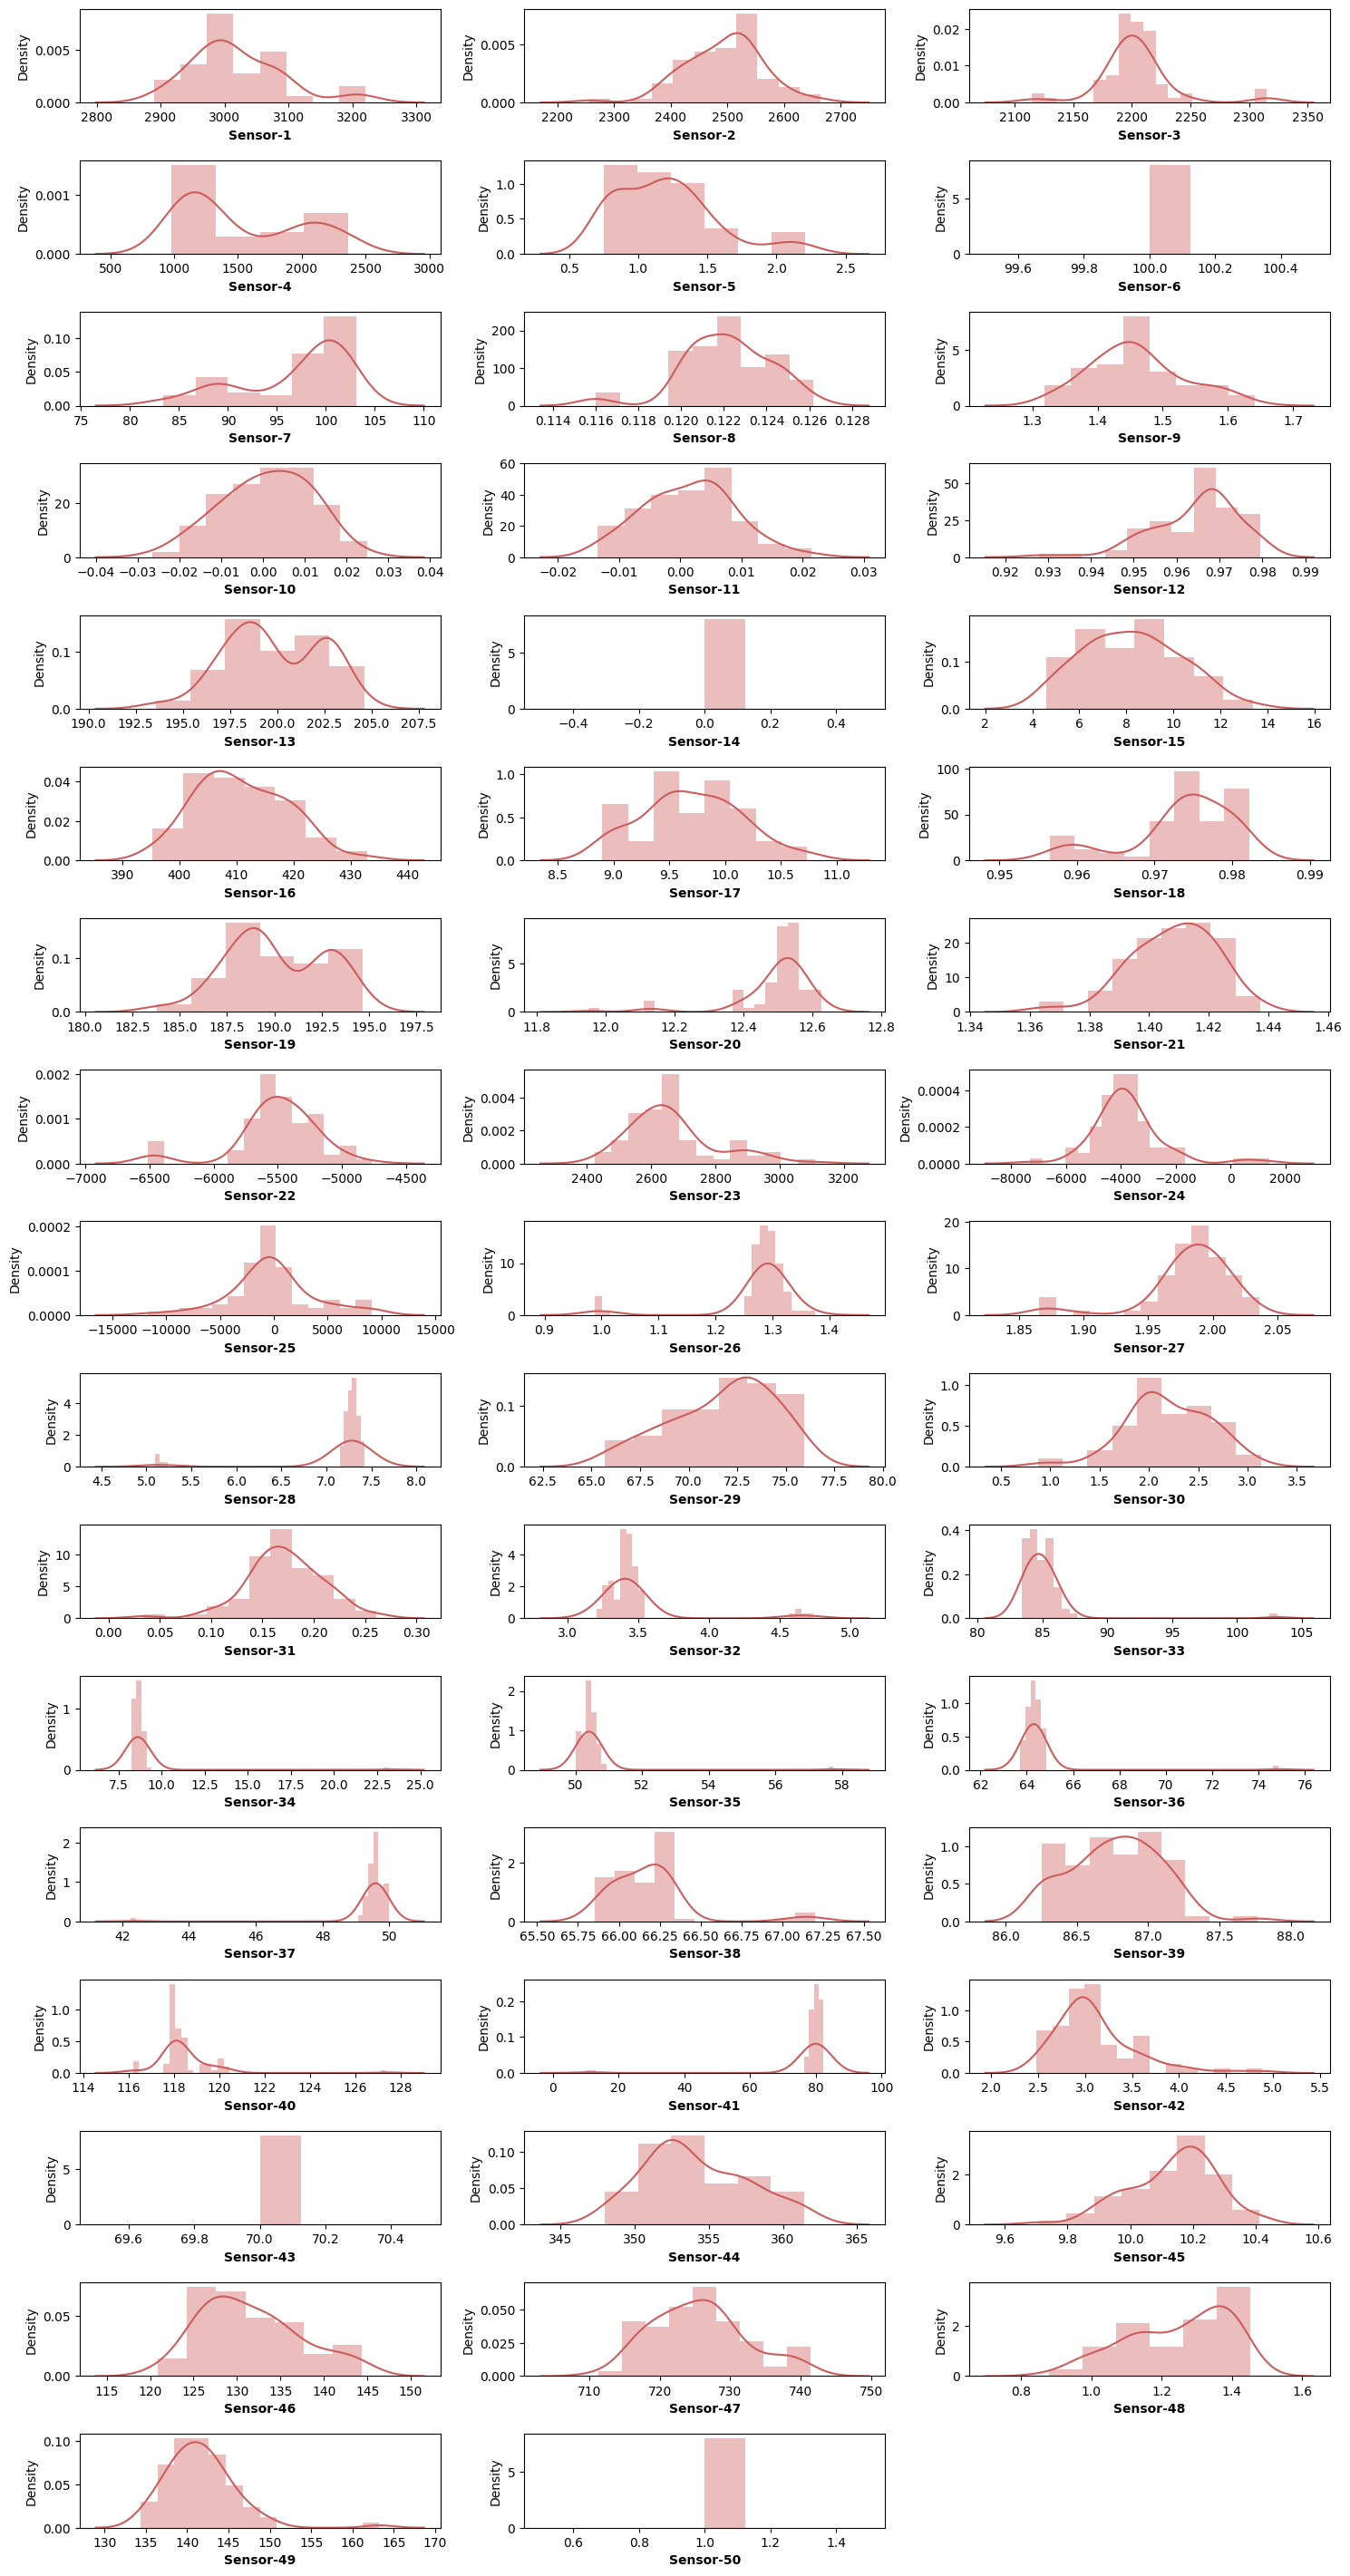

In [108]:
plt.figure(figsize=(15,100))
for i, col in enumerate(wafers.columns[1:51]):
    plt.subplot(60,3,i+1)
    sns.distplot(x=wafers[col],color='indianred')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

In [109]:
random_50_sensor_idx=[]
for i in range(50):
    if i not in random_50_sensor_idx:
        random_50_sensor_idx.append(np.random.randint(1,591))

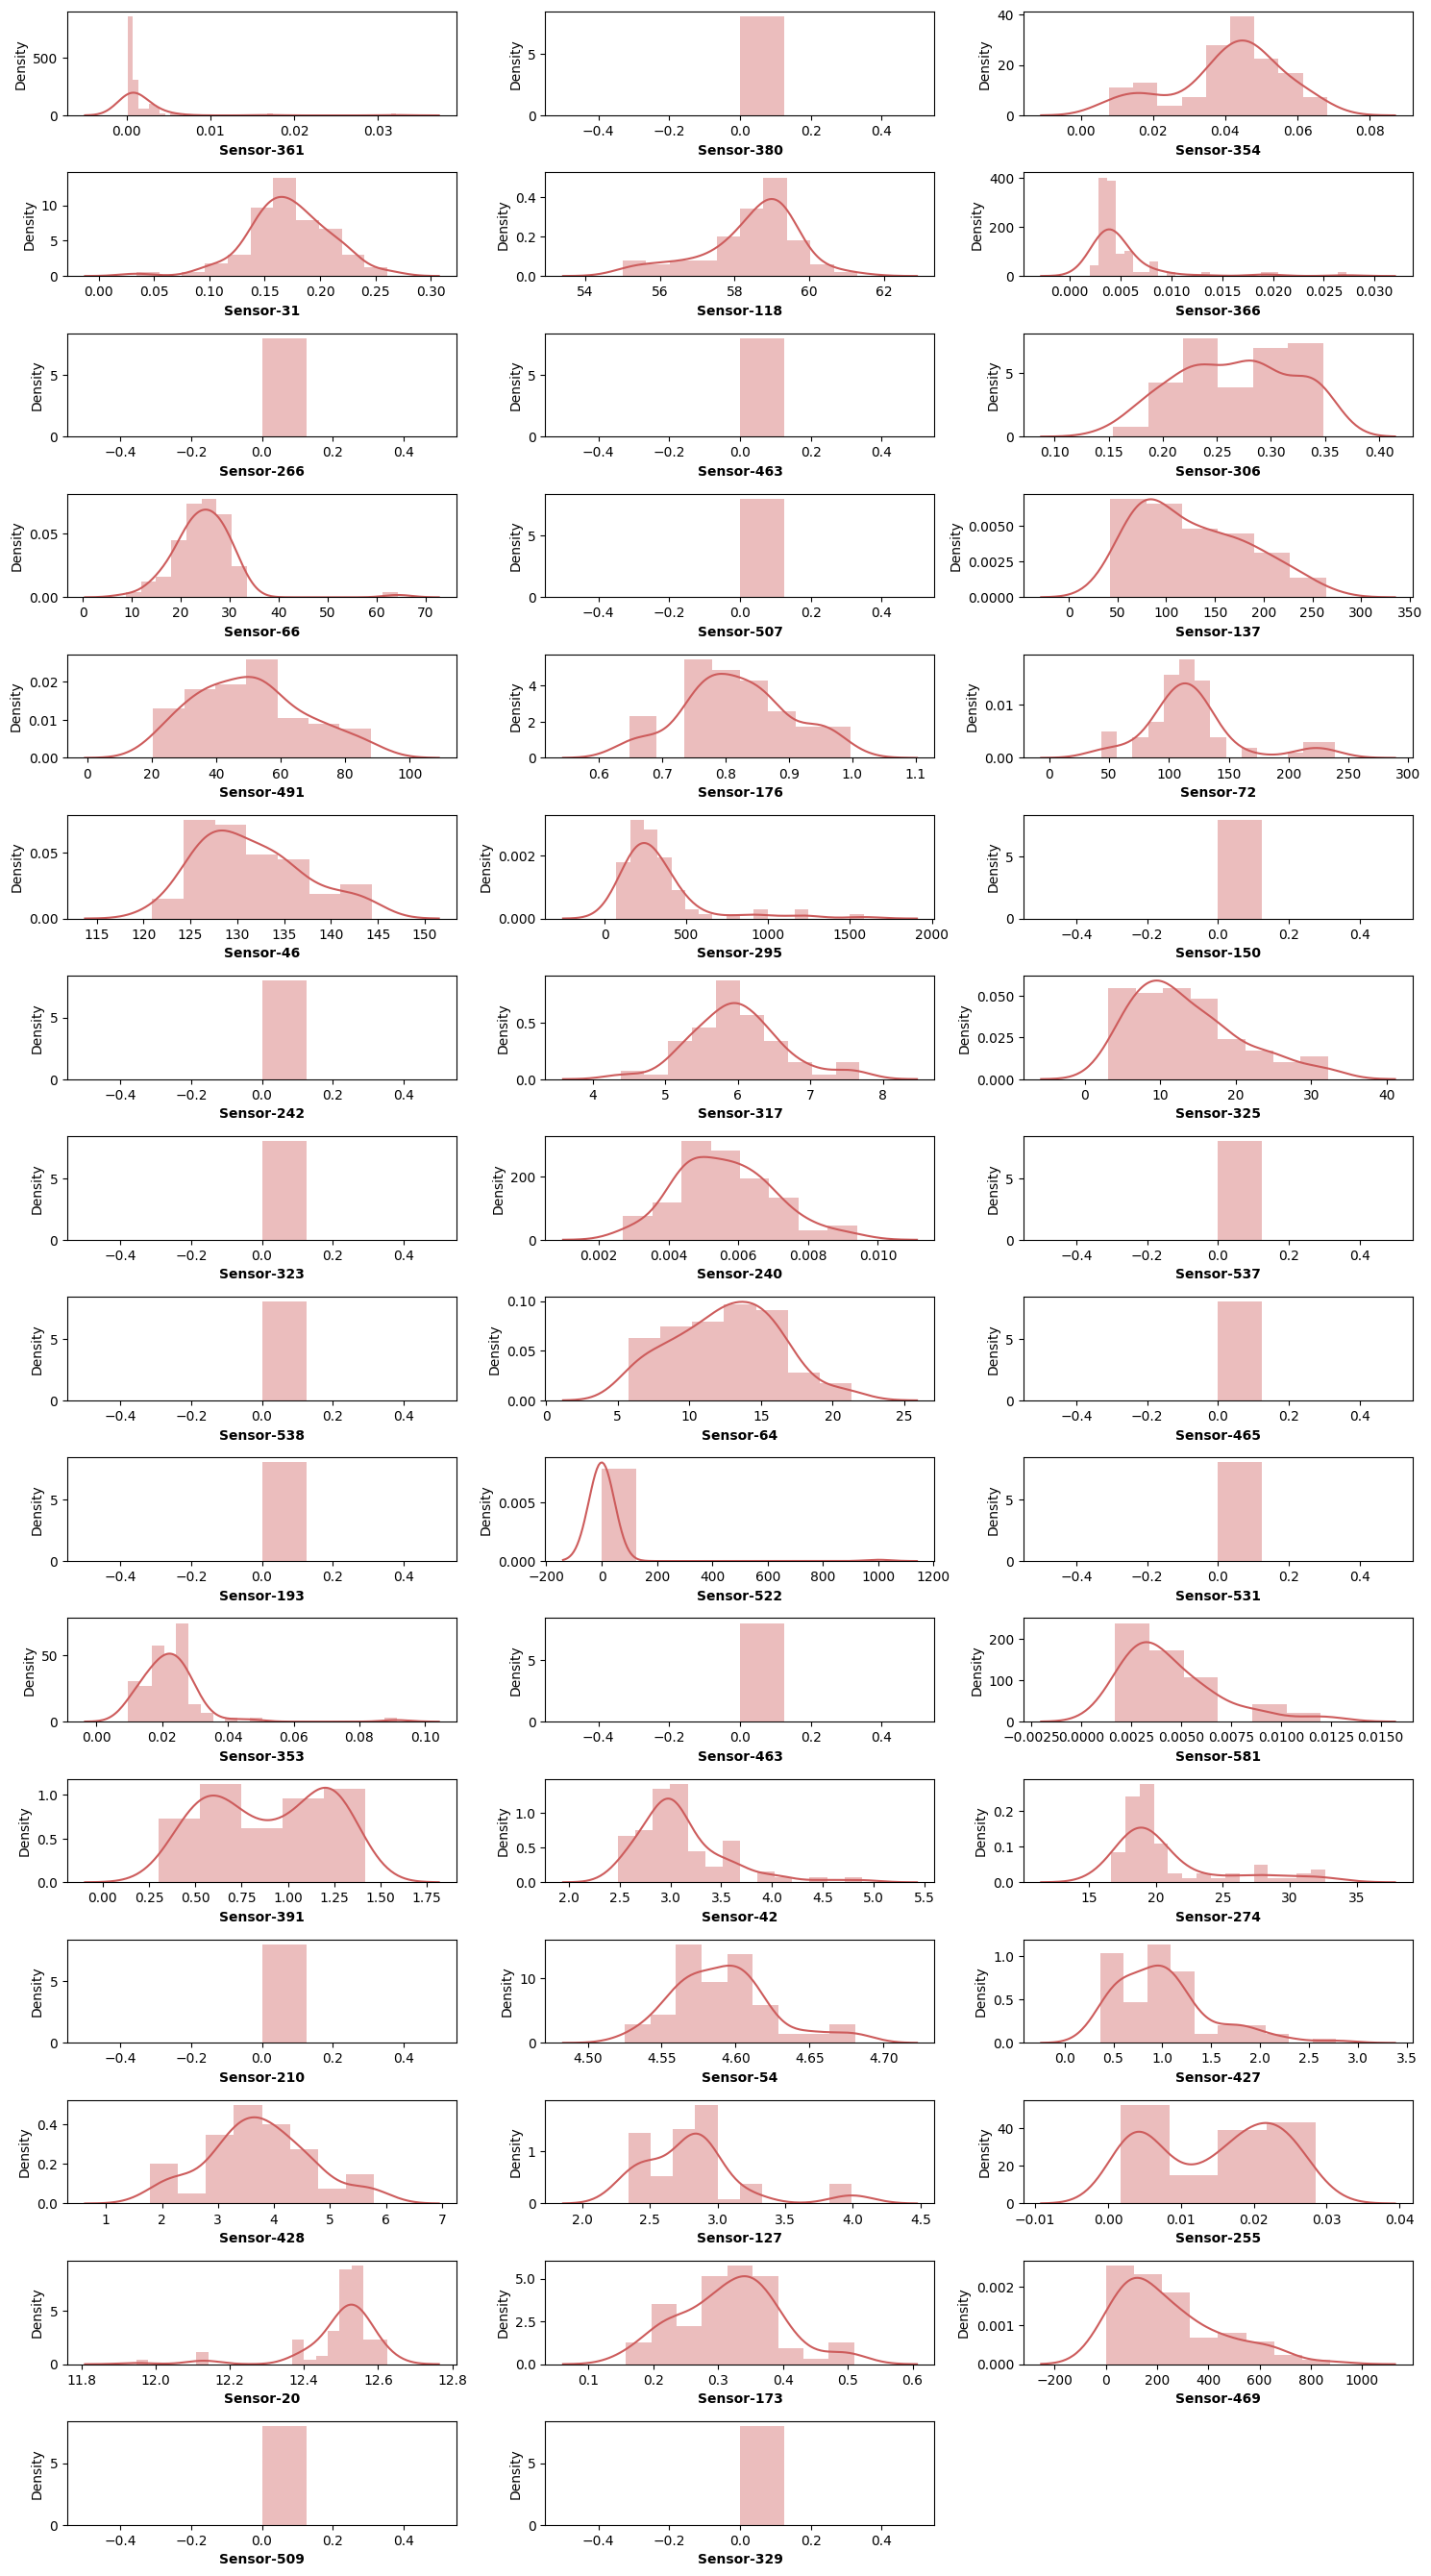

In [110]:
plt.figure(figsize=(15,100))

for i,col in enumerate(wafers.columns[random_50_sensor_idx]):
    plt.subplot(60,3,i+1)
    sns.distplot(x=wafers[col],color='indianred')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

In [111]:
def get_cols_with_zero_std_dev(df:pd.DataFrame):
    """

    Return a list columns names who are having zero standard deviation
    """
    cols_to_drop=[]
    num_cols=[col for col in df.columns if df[col].dtype !='O']
    #numerical cols only
    for col in num_cols:
        if df[col].std()==0:
            cols_to_drop.append(col)
    return cols_to_drop
    
def get_redundant_cols(df: pd.DataFrame,missing_thresh=.7):
    """
    Return a list of columns having missing values more than certain thresh.
    """
    cols_missing_ratios=df.isna().sum().div(df.shape[0])
    cols_to_drop=list(cols_missing_ratios[cols_missing_ratios > missing_thresh].index)
    return cols_to_drop

In [112]:
cols_to_drop_1=get_redundant_cols(wafers,missing_thresh=.7)
cols_to_drop_1

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [113]:
cols_to_drop_2=get_cols_with_zero_std_dev(df=wafers)
cols_to_drop_2.append('Wafer')
cols_to_drop_2

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [114]:
wafers.head()

,Wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,100.0,89.7222,0.1251,1.5762,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,100.0,102.3622,0.1208,1.4756,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.0,100.7744,0.1234,1.5590,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,100.0,99.2178,0.1221,1.4542,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.4958,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1


In [115]:
cols_to_drop=cols_to_drop_1 + cols_to_drop_2
len(cols_to_drop)

127

In [116]:
# seperate feature and label out
x,y=wafers.drop(cols_to_drop,axis=1),wafers[['Good/Bad']]

In [117]:
print("Shape of the features now:",x.shape)
x.head()

Shape of the features now: (80, 465)


,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,NaN,2532.45,2191.1333,2197.6570,1.1569,89.7222,0.1251,1.5762,0.0028,-0.0066,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,3221.21,2391.20,2189.9667,1046.6212,0.8662,102.3622,0.1208,1.4756,-0.0025,0.0025,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.7744,0.1234,1.5590,-0.0032,0.0135,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,2982.07,2447.06,2199.6334,1242.8420,1.4083,99.2178,0.1221,1.4542,0.0142,-0.0064,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,3058.08,2524.60,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.4958,0.0004,0.0037,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1


In [118]:
print('Shape of the labels:',y.shape)
y.head()

Shape of the labels: (80, 1)


,Good/Bad
55,-1
88,-1
26,-1
42,-1
69,-1


In [119]:
# DATA TRANSFORMATION :

In [120]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import Standardscaler

imputer=KNNImputer(n_neighbors=3)
preprocessing_pipeline=Pipeline(
    steps=[('Imputer',imputer),('scaler',RobustScaler())])
preprocessing_pipeline


Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('scaler', RobustScaler())])

In [121]:
x_trans=preprocessing_pipeline.fit_transform(x)
print('Shape of transformed features set:',x_trans.shape)
x_trans

Shape of transformed features set: (80, 465)


array([[-0.02781221,  0.37395233, -0.4289214 , ...,  0.        ,
         0.75955556,  0.        ],
       [ 2.50431022, -1.38644649, -0.47986463, ..., -0.51612903,
        -0.52610857,  0.        ],
       [-0.60204699,  0.28110298, -0.49685153, ...,  0.58064516,
        -0.08775867,  0.        ],
       ...,
       [-0.03223295,  0.21779093,  1.03590393, ...,  0.12903226,
        -0.17805529,  0.        ],
       [ 0.03396281,  0.87459106,  0.53517467, ...,  0.29032258,
         0.28421459,  0.        ],
       [ 0.86164048,  0.3813055 , -0.59146288, ..., -0.16129032,
        -0.20782888,  0.        ]])

In [122]:
# shall we cluster 'wafers' instance ?

In [123]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [124]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple
from dataclasses import dataclass

@dataclass
class ClusterDataInstances:
    """Divides the given data instance into different clusters via KMeans Clustering algorithm.

    Args:
        x(np.array):Takes in an array which gotta be clustered.
        desc(str):Description of the said array
    """
    x:np.array
    desc:str

    def _get_ideal_number_of_clusters(self):
        """Returns the ideal number of clusters the given data instance should be divided into by locating the dispersal point in number of clusters vs WCSS plot.

        Raises:
            e:Raises relevant exception should any kinda error pops up while determining the ideal number of clusters.
        Returns:
            int:Ideal number of clusters the given data instances should be divided into.
        """
        try:
            print(
                f'Getting the ideal number of clusters to cluster"{self.desc} set" into..')
            #################### Compute WCSS for shortlisted number of clusters###################
            print('computing WCSS for shortlisted number of clusters..')
            wcss=[] #within summetion of squares
            for i in range(1,11):
                kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
                kmeans.fit(self.x)
                wcss.append(kmeans.inertia_)
                print(f"WCSS for n_clusters={i}:{kmeans.inertia_}")
            print(
                "WCSS computed sucessfully for al shortlisted number of clusters!")

            ###########Finalize dispersal point as the ideal number of clusters########
            print(
                'Finding the ideal number of clusters(by locating the dispersal point) via Elbow method..')
            knee_finder=KneeLocator(
                range(1,11),wcss,curve='convex',direction='decreasing')
            print(
                f"Ideal number of clusters to be formed:{knee_finder.knee}")
            return knee_finder.knee
            ...
        except Exception as e:
            print(e)
            raise e
    def create_clusters(self) -> Tuple:
        """Divide the given data instance into the different clusters,they first hand should've been divided into via offcourse Kmeans Clustering algoritm.
            
        Raises:
            e:Raises relevant exception should any kinda error pops up while dividing the given data instance into clusters.

        Returns:
            (KMeans,np.array):KMeans Clustering object being used to cluster the given data instance and the given dataset along with the cluster labels,respectively.
        """
        try:
            ideal_clusters=self._get_ideal_number_of_clusters()
            print(
                    f"Dividing the \"{self.desc}\" instance into {ideal_clusters} clusters via KMeans Clustering algorithm..")
            kmeans=KMeans(n_clusters=ideal_clusters,init='k-means++',random_state=42)
            y_means=kmeans.fit_predict(self.x)
            print(
                    f"..said data instance divided into{ideal_clusters} clusters sucessfully!!")

            return kmeans,np.c_[self.x,y_means]
            ...
        except Exception as e:
            print(e)
            raise e

In [125]:
# cluster wafers instance
cluster_wafers=ClusterDataInstances(x=x_trans,desc='wafers features')
clusterer,x_clus=cluster_wafers.create_clusters()
x_clus

Getting the ideal number of clusters to cluster"wafers features set" into..
computing WCSS for shortlisted number of clusters..
WCSS for n_clusters=1:7157148.928067336
WCSS for n_clusters=2:2060306.1634277871
WCSS for n_clusters=3:1075227.4800905853
WCSS for n_clusters=4:530517.1820611967
WCSS for n_clusters=5:485669.8162062416
WCSS for n_clusters=6:437364.96477712144
WCSS for n_clusters=7:226364.9606360452
WCSS for n_clusters=8:190022.6930221619
WCSS for n_clusters=9:147066.9112426604
WCSS for n_clusters=10:108703.08733901892
WCSS computed sucessfully for al shortlisted number of clusters!
Finding the ideal number of clusters(by locating the dispersal point) via Elbow method..
Ideal number of clusters to be formed:3
Dividing the "wafers features" instance into 3 clusters via KMeans Clustering algorithm..
..said data instance divided into3 clusters sucessfully!!


array([[-0.02781221,  0.37395233, -0.4289214 , ...,  0.75955556,
         0.        ,  1.        ],
       [ 2.50431022, -1.38644649, -0.47986463, ..., -0.52610857,
         0.        ,  1.        ],
       [-0.60204699,  0.28110298, -0.49685153, ..., -0.08775867,
         0.        ,  1.        ],
       ...,
       [-0.03223295,  0.21779093,  1.03590393, ..., -0.17805529,
         0.        ,  0.        ],
       [ 0.03396281,  0.87459106,  0.53517467, ...,  0.28421459,
         0.        ,  1.        ],
       [ 0.86164048,  0.3813055 , -0.59146288, ..., -0.20782888,
         0.        ,  1.        ]])

In [127]:
np.unique(x_clus[:,-1])

array([0., 1., 2.])

In [129]:
# configure "clustered" aray along with target features
wafers_clus=np.c_[x_clus,y]
# cluster_1 data
wafers_1=wafers_clus[wafers_clus[:,-2]==0]
wafers_1.shape

(17, 467)

In [130]:
# wafers_2 data
wafers_clus[wafers_clus[:,-2]==1].shape

(62, 467)

In [131]:
# wafers_3 data
wafers_clus[wafers_clus[:,-2]==2].shape

(1, 467)

In [132]:
# RESAMPLING OF TRAINING INSTANCES

In [133]:
%pip install imbalanced-learn

   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   --------- ------------------------------ 61.4/257.7 kB 1.7 MB/s eta 0:00:01
   -------------- ------------------------- 92.2/257.7 kB 1.3 MB/s eta 0:00:01
   ------------------ ------------------- 122.9/257.7 kB 901.1 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/257.7 kB 901.1 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/257.7 kB 610.6 kB/s eta 0:00:01
   ---------------------------- --------- 194.6/257.7 kB 695.5 kB/s eta 0:00:01
   -------------------------------------  256.0/257.7 kB 787.7 kB/s eta 0:00:01
   -------------------------------------- 257.7/257.7 kB 689.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [136]:
from imblearn.combine import SMOTETomek
x,y=x_trans[:,:-1],y
resampler=SMOTETomek(sampling_strategy='auto')
x_res,y_res=resampler.fit_resample(x,y)

In [137]:
print('Before resampling,shape of training instances:',np.c_[x,y].shape)
print('after resampling,shape of training instance:',np.c_[x_res,y_res].shape)

Before resampling,shape of training instances: (80, 465)
after resampling,shape of training instance: (148, 465)


In [138]:
print(np.unique(y_res))
print(f"Value Counts:\n-1:{len(y_res[y_res==1])},1:{len(y_res[y_res==1])}")

[-1  1]
Value Counts:
-1:148,1:148


In [139]:
# prepare the test set:

In [140]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=1/3,random_state=42)

print(f"train set:{x_train.shape,y_train.shape}")
print(f"train set:{x_test.shape,y_test.shape}")

train set:((98, 464), (98, 1))
train set:((50, 464), (50, 1))


In [141]:
x_prep=x_train
y_prep=y_train
x_test_prep=x_test
y_test_prep=y_test

print(x_prep.shape,y_prep.shape)
print(x_test_prep.shape,y_test_prep.shape)

(98, 464) (98, 1)
(50, 464) (50, 1)


In [143]:
%pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.7 MB/s eta 0:01:01
   ---------------------------------------- 0.1/99.8 MB 2.1 MB/s eta 0:00:47
   ---------------------------------------- 0.2/99.8 MB 1.5 MB/s eta 0:01:07
   ---------------------------------------- 0.3/99.8 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 0.4/99.8 MB 1.9 MB/s eta 0:00:53
   ---------------------------------------- 0.5/99.8 MB 1.8 MB/s eta 0:00:57
   ---------------------------------------- 0.6/99.8 MB 1.7 MB/s eta 0:00:58
   ---------------------------------------- 0.6/99.8 MB 1.7 MB/s eta 0:01:00
   ---------------------------------------- 0.7/99.8 MB 1.8 MB/s eta 0:00:57
   ---------------------------------------- 0.8/99.8 MB 1.9 MB/s eta 0:00:53
   ---------------------------------------- 0.9/99.8 MB 1.8 MB/s eta 0:00:54
   ---------------------------------------- 0.9/99.8 MB 1.7 MB/s eta 0:00:57
   ---


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [146]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

# shortlisted base model
svc_clf=SVC(kernel='linear')
svc_rbc_clf=SVC(kernel='rbf')
random_clf=RandomForestClassifier(random_state=42)
xgb_clf=XGBClassifier(objective='binary:logistic')

In [147]:
# a function to display scores

def display_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard Deviation:',scores.std())

In [148]:
# Evaluating SVC(kernal='linear') using cross-validation:

In [149]:
svc_scores=cross_val_score(svc_clf,x_prep,y_prep,scoring='roc_auc',cv=10,verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [150]:
display_scores(svc_scores)

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0
Standard Deviation: 0.0


In [152]:
# performance on test set using cross-validation
# prediction using cross-validation
svc_preds=cross_val_predict(svc_clf,x_test_prep,y_test_prep,cv=5)
# AUC score
svc_auc=roc_auc_score(y_test_prep,svc_preds)
svc_auc

0.94

In [153]:
# evaluating SVC(kernal='rbf') using cross-validation:


In [155]:
svc_rbf_scores=cross_val_score(svc_rbc_clf,x_prep,y_prep,scoring='roc_auc',cv=10,verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [158]:
display_scores(svc_rbf_scores)

Scores: [1.   1.   0.76 0.92 1.   1.   1.   1.   1.   1.  ]
Mean: 0.968
Standard Deviation: 0.07332121111929343


In [161]:
# performance on test set using cross-validation
# prediction using cross-validation
svc_rbf_preds=cross_val_predict(svc_rbc_clf,x_test_prep,y_test_prep,cv=5)
# AUC score
svc_rbf_auc=roc_auc_score(y_test_prep,svc_rbf_preds)
svc_rbf_auc

0.6799999999999999

In [162]:
# evaluating  RandomForestClassifier using cross-validation:

In [164]:
random_clf_scores=cross_val_score(random_clf,x_prep,y_prep,scoring='roc_auc',cv=10,verbose=2)

[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s


In [165]:
display_scores(random_clf_scores)

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0
Standard Deviation: 0.0


In [166]:
# performance on test set using cross-validation
# prediction using cross-validation
random_clf_preds=cross_val_predict(random_clf,x_test_prep,y_test_prep,cv=5)
# AUC Score
random_clf_auc=roc_auc_score(y_test_prep,random_clf_preds)
random_clf_auc

1.0